In [1]:
import numpy as np
import os

from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
from IPython.display import display, Math, Latex

from quantuminspire.credentials import get_authentication
from quantuminspire.api import QuantumInspireAPI
from quantuminspire.qiskit import QI
import matplotlib.pyplot as plt
from qiskit import IBMQ, QuantumCircuit, pulse, schedule, transpile
from scipy.optimize import curve_fit


QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')

authentication = get_authentication()
#authentication = set_authentication('YOUR_API_TOKEN',QI_URL)
QI.set_authentication(authentication, QI_URL)
QI.set_project_name('Charger-mediated Charging q3-q1-1')


backend = QI.get_backend('Starmon-5')

font = {'family':'serif','size':18}

In [19]:
def finding_value(counts,qubit,shots):
    total = 0
    if qubit == 0:
        for binary_string, number in counts.items():
            if binary_string[4] == '1':
                total += number
    if qubit == 1:
        for binary_string, number in counts.items():
             if binary_string[3] == '1':
                total += number
    if qubit == 2:
        for binary_string, number in counts.items():
             if binary_string[2] == '1':
                total += number
    if qubit == 3:
        for binary_string, number in counts.items():
             if binary_string[1] == '1':
                total += number
    if qubit == 4:
        for binary_string, number in counts.items():
             if binary_string[0] == '1':
                total += number
    return total/shots

In [20]:
from fractions import Fraction
import matplotlib.ticker as ticker

#function to get pi axis labels 
def pi_axis(value, tick_number):
    if np.isclose(value, 0):  
        return '0'
    elif np.isclose(value, np.pi): 
        return r'$\pi$'
    else:
        frac = Fraction(value / np.pi).limit_denominator(8)  
        if frac == 1:
            return r'$\pi$'
        elif frac == -1:
            return r'$-\pi$'
        else:
            if frac.numerator == 1:
                return r'$\frac{\pi}{' + f"{frac.denominator}" + r'}$'
            elif frac.numerator == -1:
                return r'$\frac{-\pi}{' + f"{frac.denominator}" + r'}$'
            else:
                return r'$\frac{' + f"{frac.numerator}\pi" + r'}{' + f"{frac.denominator}" + r'}$'

In [21]:
theta = np.linspace(0, np.pi, 16)
num_datapoints = 10
shots = 1024

charger=2
qubit=3

data_q3=[]
y_values=[] 


#for i in range(num_datapoints):
#    for t in theta:
#        qr = QuantumRegister(5)
#        cr = ClassicalRegister(5)
#        qc = QuantumCircuit(qr,cr)
#        qc.rx(t,charger)
#        qc.cnot(charger,qubit)
#        qc.measure(qr[qubit],cr[qubit])
#        
#        job = backend.run(qc,shots)
#        counts = job.result().get_counts()
#        y_values.append(finding_value(counts,qubit,shots))
#        
#    data_q3.append(y_values)
#    y_values=[]

In [22]:
data_q3=[[0.009765625, 0.017578125, 0.060546875, 0.109375, 0.146484375, 0.2353515625, 0.3251953125, 0.41796875, 0.55078125, 0.64453125, 0.7451171875, 0.841796875, 0.85546875, 0.9169921875, 0.9462890625, 0.9609375], [0.01953125, 0.0146484375, 0.056640625, 0.1044921875, 0.1533203125, 0.2421875, 0.32421875, 0.443359375, 0.548828125, 0.6484375, 0.7421875, 0.8447265625, 0.8623046875, 0.9345703125, 0.955078125, 0.966796875], [0.005859375, 0.0146484375, 0.05078125, 0.1005859375, 0.16015625, 0.2490234375, 0.337890625, 0.4580078125, 0.5498046875, 0.6416015625, 0.73046875, 0.8291015625, 0.86328125, 0.9072265625, 0.951171875, 0.958984375], [0.01171875, 0.0146484375, 0.0546875, 0.111328125, 0.1572265625, 0.2109375, 0.3203125, 0.41796875, 0.5400390625, 0.6220703125, 0.7451171875, 0.8173828125, 0.8642578125, 0.9091796875, 0.9658203125, 0.9658203125], [0.0126953125, 0.0166015625, 0.05078125, 0.12109375, 0.158203125, 0.2314453125, 0.3544921875, 0.443359375, 0.55859375, 0.6796875, 0.7587890625, 0.8232421875, 0.859375, 0.919921875, 0.94921875, 0.9658203125], [0.009765625, 0.017578125, 0.0654296875, 0.1220703125, 0.158203125, 0.232421875, 0.3251953125, 0.4306640625, 0.5615234375, 0.6689453125, 0.7373046875, 0.826171875, 0.841796875, 0.91796875, 0.9482421875, 0.96875], [0.0048828125, 0.015625, 0.0576171875, 0.1220703125, 0.142578125, 0.2275390625, 0.3203125, 0.4248046875, 0.5146484375, 0.6494140625, 0.7490234375, 0.8154296875, 0.865234375, 0.92578125, 0.9580078125, 0.974609375], [0.0068359375, 0.025390625, 0.0556640625, 0.1162109375, 0.146484375, 0.2470703125, 0.34375, 0.42578125, 0.541015625, 0.6728515625, 0.75390625, 0.810546875, 0.8662109375, 0.9228515625, 0.9677734375, 0.9716796875], [0.005859375, 0.0185546875, 0.0625, 0.111328125, 0.1513671875, 0.2529296875, 0.3291015625, 0.4140625, 0.5390625, 0.640625, 0.7412109375, 0.828125, 0.8505859375, 0.9111328125, 0.9541015625, 0.9638671875], [0.0107421875, 0.017578125, 0.0673828125, 0.10546875, 0.158203125, 0.25, 0.3515625, 0.443359375, 0.5302734375, 0.6494140625, 0.7509765625, 0.818359375, 0.8681640625, 0.9267578125, 0.9541015625, 0.9580078125]]


## Plot Raw Data

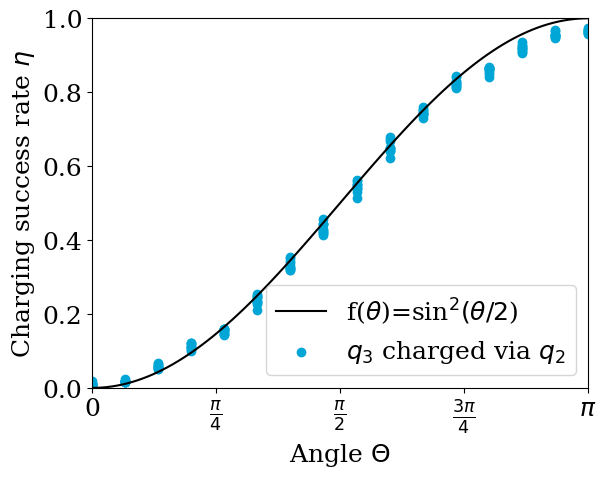

In [23]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in range(len(data_q3)):
    plt.scatter(theta,data_q3[i],color=tud_color)

tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions)

plt.xlim(0, np.pi)
plt.ylim(0, 1)

plt.xticks(font=font)
plt.yticks(font=font)

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Charging success rate $\eta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "$q_3$ charged via $q_2$"], prop=font, loc="lower right")


## Mean values & errors

In [24]:
dataF=np.array(data_q3)
data=dataF.transpose()

In [25]:
#Mean Value
mean_values = []
for t in range(len(theta)):
    mean_values.append(np.mean(data[t])) 
    
print('Mean values:', mean_values)

Mean values: [0.009765625, 0.01728515625, 0.058203125, 0.11240234375, 0.15322265625, 0.237890625, 0.333203125, 0.43193359375, 0.54345703125, 0.6517578125, 0.74541015625, 0.82548828125, 0.85966796875, 0.91923828125, 0.95498046875, 0.96552734375]


In [26]:
#Standard Deviation
std_dev=[]
for t in range(len(theta)):
    std_dev.append(np.std(data[t])) 

print('Standard Deviation:', std_dev)

Standard Deviation: [0.0041432037960149265, 0.00302734375, 0.005405606446522674, 0.007339827118794357, 0.005882927922589467, 0.012292280451218409, 0.012172215977252253, 0.013679197257955977, 0.01311105623251714, 0.016441090238855434, 0.007825306885767823, 0.010500204175144717, 0.007788659914683755, 0.008159411990353246, 0.00678623111448894, 0.005056481822656101]


In [27]:
#Standard Error
std_err=[]

for t in range(len(theta)):
    std_err.append(np.std(data[t]) / np.sqrt(np.size(data[t])))
    
print('Standard Error:', std_err)

Standard Error: [0.0013101960805662828, 0.0009573301510275367, 0.001709402850550083, 0.0023210571327261435, 0.0018603451545985443, 0.0038871603863412456, 0.0038491926659609418, 0.004325741989787074, 0.004146080022530035, 0.005199129237114494, 0.0024745793148825378, 0.003320456109026688, 0.0024629905250853393, 0.002580232625720408, 0.002145994705008794, 0.0015989999506832876]


In [28]:
#Maximum values 
max_values = []
for t in range(len(theta)):
    max_values.append(np.max(data[t])) 
print('Maximum values:',max_values)
    
#Minimum values
min_values = []
for t in range(len(theta)):
    min_values.append(np.min(data[t])) 
print('Minimum values:',min_values)

Maximum values: [0.01953125, 0.025390625, 0.0673828125, 0.1220703125, 0.16015625, 0.2529296875, 0.3544921875, 0.4580078125, 0.5615234375, 0.6796875, 0.7587890625, 0.8447265625, 0.8681640625, 0.9345703125, 0.9677734375, 0.974609375]
Minimum values: [0.0048828125, 0.0146484375, 0.05078125, 0.1005859375, 0.142578125, 0.2109375, 0.3203125, 0.4140625, 0.5146484375, 0.6220703125, 0.73046875, 0.810546875, 0.841796875, 0.9072265625, 0.9462890625, 0.9580078125]


# Curve fit, Plot mean value & errors

In [29]:
from scipy.optimize import curve_fit

In [30]:
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

In [31]:
guess = [0.9999, 0]

xdata=theta
ydata=mean_values

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)


fit_a = parameters[0]
fit_b = parameters[1]

In [32]:
print(fit_a)
print(fit_b)

0.9797412879365358
-0.09518047532520525


In [33]:
SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.97974 with standard error of 0.00455.
The value of phi is -0.09518 with standard error of 0.03613.


In [34]:
x_func = np.linspace(min(theta), max(theta), 1000)
fit_sin2 = sin2_func(x_func, fit_a, fit_b)

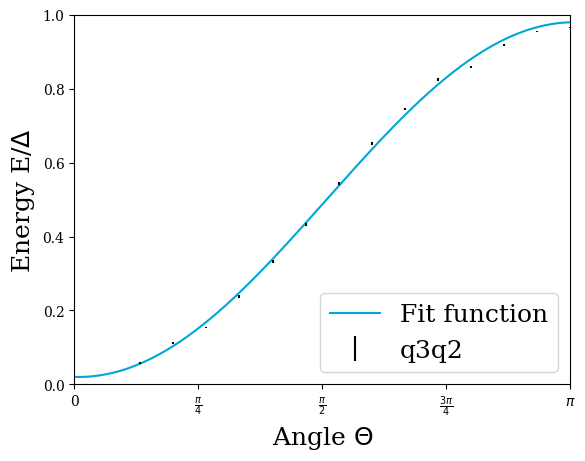

In [35]:

plt.plot(x_func, fit_sin2 , '-', label='fit',color=tud_color)
#plt.errorbar(theta, mean_values, yerr=std_err, fmt='.', ecolor='black',capsize=3)
plt.errorbar(theta, mean_values, yerr=std_err, fmt='none',ecolor='black')

tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions)

plt.xlim(0, np.pi)
plt.ylim(0, 1)


plt.xticks(fontname='serif')
plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)
plt.legend(["Fit function", "q3q2"], prop=font, loc="lower right")